### 3.1 Churn Prediction Project

In [61]:
import pandas as pd
import numpy as np
from typing import Optional
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline  

#### 3.2 Data Preparation

In [62]:
def load_dataset(filepath:str)->Optional[DataFrame]:
    """
    Load the dataset from the given file path and return the data frame
    Ags:
        filepath: str: File path to the dataset
    return: 
        DataFrame: Data frame of the dataset
    """
    try:
      df = pd.read_csv(filepath)
      return df
    except:
      raise FileNotFoundError("File not found")
      return None

In [63]:
data = load_dataset("../data/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
data.shape

(7043, 21)

In [66]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [67]:
def standardize_column_names(data:DataFrame)->DataFrame:
    """
    Standardize the column names of the given dataframe
    Args:
      data: DataFrame: Dataframe to standardize the column names
    return: 
      DataFrame: Dataframe with standardized column names
    """
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    return data

In [68]:
data = standardize_column_names(data)
data.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [69]:
def clean_category_columns(data:DataFrame)->DataFrame:
    """
    This function converts all string values in categorical columns 
    to lowercase and replaces spaces with underscores in a DataFrame.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame to be cleaned.

    Returns:
    pd.DataFrame: The cleaned DataFrame with modified categorical columns.
    """
    # Select categorical (object type) columns
    category_columns = data.select_dtypes(include=['object']).columns
    
    # Loop through each categorical column
    for col in category_columns:
        # Modify the string values to lowercase and replace spaces with underscores
        data[col] = data[col].astype(str)
        data[col] = data[col].str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    
    return data 

In [70]:
data = clean_category_columns(data)

In [71]:
data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [72]:
data.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [73]:

def clean_totalcharges(data, column_name):
    """
    This function converts a specified column in the DataFrame to a numeric type,
    coerces invalid parsing to NaN, and fills any NaN values with 0.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to be cleaned.
    
    Returns:
    pd.DataFrame: The cleaned DataFrame with the specified column modified.
    """
    # Convert the specified column to numeric, coercing errors to NaN
    data[column_name] = pd.to_numeric(data[column_name], errors='coerce')
    
    # Fill NaN values with 0
    data[column_name] = data[column_name].fillna(0)
    
    return data

In [74]:
data = clean_totalcharges(data, 'totalcharges')

In [75]:
data[['totalcharges','customerid']].isnull().sum()

totalcharges    0
customerid      0
dtype: int64

In [76]:
def convert_churn_to_binary(data:DataFrame, column: str) -> Optional[DataFrame]:
    '''
    Converts the specified column from 'Yes'/'No' to 1/0 if the column exists in the DataFrame.
    
    Args:
        data: pd.DataFrame: The DataFrame containing the column to convert.
        column: str: The name of the column to convert.
        
    Returns:
        Optional[DataFrame]: The DataFrame with the specified column converted to binary, or unmodified if column doesn't exist.
    '''
    if column in data.columns:
        data[column] = (data[column].str.strip().str.lower() == 'yes').astype(int)
    else:
        print(f"Column '{column}' not found in the DataFrame")
    return data

In [77]:
data = convert_churn_to_binary(data, 'churn')
data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [78]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [79]:
data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [80]:
def convert_column_to_object(data, column):
    """
    Convert a specified column in a pandas DataFrame to the 'object' data type.

    Args:
        df (pandas.DataFrame): The DataFrame containing the column to convert.
        column (str): The name of the column to be converted to 'object' type.

    Returns:
        pandas.DataFrame: The DataFrame with the specified column converted to 'object' type.
    """
    data[column] = data[column].astype(object)
    return data

In [81]:
data = convert_column_to_object(data, 'seniorcitizen')
data.dtypes

customerid           object
gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

### 3.3. Setting up the validation framework.

In [82]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(data,test_size=0.2, random_state=1)


In [83]:
df_full_train.head().T

,1814,5946,3881,2389,3676
customerid,5442-pptjy,6261-rcvns,2176-osjuv,6161-erdgd,2364-ufrom
gender,male,female,male,male,male
seniorcitizen,0,0,0,0,0
partner,yes,no,yes,yes,no
dependents,yes,no,no,yes,no
tenure,12,42,71,71,30
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,yes,yes,no
internetservice,no,dsl,dsl,dsl,dsl
onlinesecurity,no_internet_service,yes,yes,yes,yes


In [84]:
len(df_full_train), len(df_test)

(5634, 1409)

In [85]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [86]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [87]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_automatic,90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [88]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [89]:
df_full_train = df_full_train.reset_index(drop=True)

In [90]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_automatic,90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [91]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [92]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3.4. EDA
 - check missing values
 - looking target variable
 - looking numeric and categorical variables.

In [93]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [94]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [95]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [96]:
global_churn_rate= df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [97]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [98]:
numerical = df_full_train.select_dtypes(include=[np.number]).columns
df_full_train[numerical].nunique()

tenure              73
monthlycharges    1494
totalcharges      5291
churn                2
dtype: int64

In [99]:
categorical = df_full_train.select_dtypes(include=['object']).columns
categorical

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [100]:
df_full_train['paymentmethod'].value_counts()

paymentmethod
electronic_check           1893
mailed_check               1305
bank_transfer_automatic    1219
credit_card_automatic      1217
Name: count, dtype: int64

In [101]:
category_columns = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
df_full_train[category_columns].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5.Feature important: churn rate and risk ratio
- churn rate
- Risk ratio
- mutual information

In [102]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_automatic,73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_automatic,65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [103]:
churn_female = df_full_train[df_full_train['gender'] == 'female'].churn.mean()
round(churn_female,2)

0.28

In [104]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
round(churn_male,2)

0.26

In [105]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
round(churn_partner,2)

0.21

In [106]:
group =  df_full_train.groupby(by='gender')[['churn']].mean()
np.round(group,3)

,churn
gender,
female,0.277
male,0.263


In [107]:
group_ =  df_full_train.groupby(by='partner')[['churn']].mean()
np.round(group_,3)

,churn
partner,
no,0.330
yes,0.205


In [108]:

churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
round(churn_no_partner,2)

0.33

In [109]:
#Difference in churn rate between customers with and without partners
churn_partner_diff = churn_partner - churn_no_partner
churn_partner_diff

-0.12477569543251776

1.Diffrence
diff = (golbal_churn - group_chure)
  - diff > 0 less likely to churn
  - diff  < 0 More likely to churn  
2. Risk ratio
   - Risk = Group_churn/ Global_churn
   - risk > 1 more likely to churn
   - Risk < 1 less likely to churn 


In [139]:
df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [140]:
def group_and_calculate(df, group_col, target_col, global_churn_rate)->DataFrame:
    """
    Groups the DataFrame by the specified column, calculates the mean and count of the target column,
    and computes the difference and risk relative to a global churn rate.
    
    Args:
          df (pd.DataFrame): The full dataset.
          group_col (str): The column by which to group the data.
          target_col (str): The target column (e.g., 'churn') to aggregate.
          global_churn (float): The global churn rate for comparison.
    
    Returns:
            pd.DataFrame: A DataFrame with mean, count, difference, and risk for each group.
    """
    df_group = df.groupby(group_col)[target_col].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    return df_group

In [141]:

for c in category_columns:
    df = group_and_calculate(df_full_train, c, 'churn', global_churn_rate)
    print(df)
    print()

            mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980

                   mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208

             mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472

                mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651

                  mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412

                      mean  count      diff

### 3.6. Feature importance: Mutual information

In [61]:

from sklearn.metrics import mutual_info_score

In [62]:
mutual_info_score(df_full_train['contract'], df_full_train['churn'])

0.0983203874041556

In [608]:
mutual_info_score(df_full_train['gender'], df_full_train['churn'])

0.0001174846211139946

In [609]:
mutual_info_score(df_full_train['partner'], df_full_train['churn'])

0.009967689095399745

In [65]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train['churn'])  

In [66]:
mi = df_full_train[category_columns].apply( mutual_info_churn_score).sort_values(ascending=False).to_frame(name='mutual_info_score')
mi


,mutual_info_score
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


### 3.7.Feature importance:Correlation
  *How about numerical columns*
  - Correlation coefficient

In [10]:
df_full_train[numerical].corrwith(df_full_train['churn'])

NameError: name 'df_full_train' is not defined

In [79]:
corr = df_full_train[numerical].corrwith(df_full_train['churn']).abs()
corr

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
churn             1.000000
dtype: float64

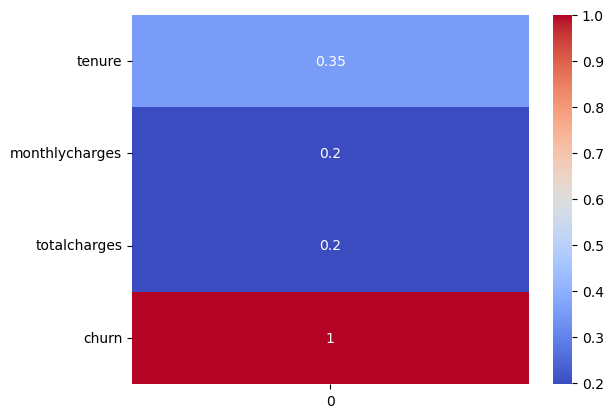

In [80]:
sns.heatmap(corr.to_frame(), cmap='coolwarm', annot=True)
plt.show()

### 3.8.Model Interpretation
- use scikit-learn to encode categorical features.

In [113]:
from sklearn.feature_extraction import DictVectorizer

In [9]:
category_columns

NameError: name 'category_columns' is not defined

In [114]:
numerical_columns = df_train.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

In [115]:
df_train.head().T

,0,1,2,3,4
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


In [116]:
def concate_to_dict(df:DataFrame, category_columns:list, numerical_columns:list)->list:
    """
    Concatenates two sets of columns from a DataFrame (categorical and numerical)
    into a list of dictionaries, where each dictionary represents a row.

   Args:
        df : pandas.DataFrame
        category_columns : list
        numerical_columns : list
   Returns:
        train_dicts : list of dictionaries
    """
    cat_dicts = df[category_columns].to_dict(orient='records')
    num_dicts = df[numerical_columns].to_dict(orient='records')
    train_dicts = []

    # Ensure both lists have the same length
    for cat, num in zip(cat_dicts, num_dicts):
        merged_dict = {**cat, **num}  # Merge each dictionary from both lists
        train_dicts.append(merged_dict)
    
    return train_dicts

In [117]:
train_dicts = concate_to_dict(df_train, category_columns, numerical_columns)


In [118]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [119]:
dv = DictVectorizer(sparse=False)

In [120]:
X_train = dv.fit_transform(train_dicts)
X_train[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03])

In [121]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_automatic',
       'paymentmethod=credit_card_automatic',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',
   

In [122]:
X_train.shape

(4225, 45)

In [123]:
val_dicts = concate_to_dict(df_val, category_columns, numerical_columns)

In [124]:
X_val = dv.transform(val_dicts)

### 3.9. Logistic Regression
      - Binary classification 
      - Linear vs logistic regression 

In [125]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [126]:
z = np.linspace(-10, 10, 51)
z

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [127]:
sigmoid(z)

array([4.53978687e-05, 6.77241496e-05, 1.01029194e-04, 1.50710358e-04,
       2.24816770e-04, 3.35350130e-04, 5.00201107e-04, 7.46028834e-04,
       1.11253603e-03, 1.65880108e-03, 2.47262316e-03, 3.68423990e-03,
       5.48629890e-03, 8.16257115e-03, 1.21284350e-02, 1.79862100e-02,
       2.65969936e-02, 3.91657228e-02, 5.73241759e-02, 8.31726965e-02,
       1.19202922e-01, 1.67981615e-01, 2.31475217e-01, 3.10025519e-01,
       4.01312340e-01, 5.00000000e-01, 5.98687660e-01, 6.89974481e-01,
       7.68524783e-01, 8.32018385e-01, 8.80797078e-01, 9.16827304e-01,
       9.42675824e-01, 9.60834277e-01, 9.73403006e-01, 9.82013790e-01,
       9.87871565e-01, 9.91837429e-01, 9.94513701e-01, 9.96315760e-01,
       9.97527377e-01, 9.98341199e-01, 9.98887464e-01, 9.99253971e-01,
       9.99499799e-01, 9.99664650e-01, 9.99775183e-01, 9.99849290e-01,
       9.99898971e-01, 9.99932276e-01, 9.99954602e-01])

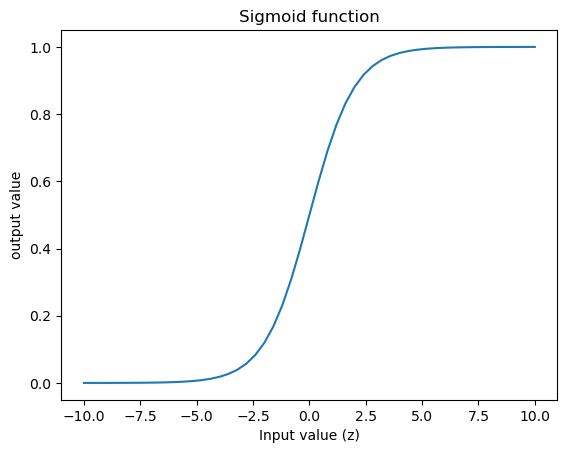

In [130]:
plt.plot(z, sigmoid(z))
plt.xlabel('Input value (z)')
plt.ylabel('output value')
plt.title('Sigmoid function')
plt.show()

In [481]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    
    return result

In [482]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

### 3.10.Logistic Regression.
      - Train a model with Scikit-Learn
      - Apply it to validate the dateset
      - Calculate the accuracy

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
model = LogisticRegression(solver='liblinear', random_state=1)

In [133]:
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [134]:
model.coef_[0]

array([ 6.06520865e-01, -5.77059269e-02, -6.70749945e-01, -2.78889774e-02,
       -9.40460295e-02,  5.21204018e-02, -1.02682424e-01, -7.13729847e-02,
       -4.20005886e-02, -7.99344183e-02, -3.75799791e-01,  3.56547208e-01,
       -1.02682424e-01,  2.35990254e-03, -2.47635372e-01,  1.33441499e-01,
       -7.74113365e-03,  5.66162057e-02, -1.02682424e-01, -7.58687887e-02,
        2.16935623e-01, -1.02682424e-01, -2.36188206e-01, -2.49227331e-01,
        1.27292324e-01, -1.15843287e-01, -6.09172000e-03, -1.00596994e-01,
       -4.85026454e-02,  6.74349453e-02, -4.02703129e-02,  1.33441499e-01,
       -2.55376505e-01,  1.98889695e-01, -1.01011275e-01, -1.02682424e-01,
        8.17586922e-02, -6.44900874e-02, -1.02682424e-01,  4.52375045e-02,
        1.70074922e-01, -1.02682424e-01, -1.89327505e-01, -6.68708243e-02,
        3.76393272e-04])

In [135]:
model.intercept_[0]

-0.12193500686681161

In [136]:
model.predict(X_train) # Hard pricection

array([0, 1, 1, ..., 1, 0, 1])

In [137]:
y_pred = model.predict_proba(X_val)[:,1]# Soft prediction  

In [348]:
churn_decision = (model.predict_proba(X_val)[:,1] >= 0.5)

In [349]:
(y_val == churn_decision).mean()

0.8034066713981547

In [350]:
df_pre = pd.DataFrame()

In [356]:
df_pre['probability'] = y_pred
df_pre['prediction'] = churn_decision.astype(int)
df_pre['actual'] = y_val

In [357]:
df_pre['correct'] = df_pre.prediction == df_pre.actual
df_pre

,probability,prediction,actual,correct
0,0.006672,0,0,True
1,0.204713,0,0,True
2,0.217679,0,0,True
3,0.564432,1,1,True
4,0.218024,0,0,True
...,...,...,...,...
1404,0.291796,0,0,True
1405,0.041186,0,1,False
1406,0.151196,0,0,True
1407,0.788134,1,1,True


In [358]:
df_pre.correct.mean()

0.8034066713981547

### 3.11. Model Interpretation
     - Look at the coefficients
     - Train a smaller model with fewer features

In [375]:
my_col = dv.get_feature_names_out()
my_col

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [380]:
small = ['contract', 'tenure', 'totalcharges']
df_small_train = df_train[small]


In [382]:
df_small_train.iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'totalcharges': 8425.15},
 {'contract': 'month-to-month', 'tenure': 10, 'totalcharges': 1021.55},
 {'contract': 'month-to-month', 'tenure': 5, 'totalcharges': 413.65},
 {'contract': 'month-to-month', 'tenure': 5, 'totalcharges': 356.1},
 {'contract': 'two_year', 'tenure': 18, 'totalcharges': 370.5},
 {'contract': 'month-to-month', 'tenure': 4, 'totalcharges': 118.4},
 {'contract': 'month-to-month', 'tenure': 1, 'totalcharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'totalcharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'totalcharges': 1567.0},
 {'contract': 'month-to-month', 'tenure': 6, 'totalcharges': 669.45}]

In [383]:
dicts_small_train = df_small_train.to_dict(orient='records')
dicts_small_val = df_val[small].to_dict(orient='records')

In [386]:
dv_small = DictVectorizer(sparse=False).fit(dicts_small_train)
dv_small.get_feature_names_out(),len(dv_small.get_feature_names_out())

(array(['contract=month-to-month', 'contract=one_year',
        'contract=two_year', 'tenure', 'totalcharges'], dtype=object),
 5)

In [387]:
X_small_train = dv_small.transform(dicts_small_train)

In [394]:
model_small = LogisticRegression()
model_small.fit(X_small_train, y_train)

/opt/anaconda3/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [395]:
w0 = model_small.intercept_[0]
w0


-0.7040083588415251

In [396]:
w = model_small.coef_[0].round(3)
w

array([ 9.280e-01, -2.310e-01, -1.392e+00, -9.500e-02,  1.000e-03])

In [404]:
my_list = list(zip(dv_small.get_feature_names_out(), w))

In [409]:
my_dict = {key: value for key, value in my_list}
my_dict

{'contract=month-to-month': 0.928,
 'contract=one_year': -0.231,
 'contract=two_year': -1.392,
 'tenure': -0.095,
 'totalcharges': 0.001}

In [410]:
sigmoid(-0.7040083588415251 + 9.280e-01)

0.5557649505769461

In [411]:
sigmoid(_)

0.6354720664295574

### 3.12. Using the model

In [487]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [490]:
dicts_full_train = concate_to_dict(df_full_train, category_columns, numerical)

In [491]:
dv = DictVectorizer(sparse=False)

In [497]:
y_full_train = df_full_train['churn'].values.astype(int)

In [498]:
y_full_train

array([0, 1, 0, ..., 1, 1, 0])

In [492]:
X_full_train = dv.fit_transform(dicts_full_train)

In [499]:
model = LogisticRegression().fit(X_full_train, y_full_train)

/opt/anaconda3/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [500]:
dicts_test = concate_to_dict(df_test, category_columns, numerical)

In [501]:
X_test = dv.transform(dicts_test)

In [503]:
y_pred = model.predict_proba(X_test)[:,1]


In [504]:
chrn_decision = (y_pred >= 0.5)

In [505]:
(y_test == chrn_decision).mean()

0.8140525195173882

In [507]:
customer = dicts_test[10] 
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [510]:
X_arr = dv.transform([customer])
X_arr

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [511]:
model.predict_proba(X_arr)[0,1]

0.49540666997820526

In [512]:
y_test[10]

0

In [514]:
customer_last = dicts_test[-1]
customer_last

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [516]:
x_last = dv.transform([customer_last])
x_last

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [517]:
model.predict_proba(x_last)[0,1]

0.656364161270536

In [518]:
y_test[-1]

1

### 3.13. Summary